In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import seaborn as sns
import random
import plotly.graph_objs as go

In [14]:
# Leggere il file GML
file_path = 'dolphins/dolphins.gml'
G = nx.read_gml(file_path)

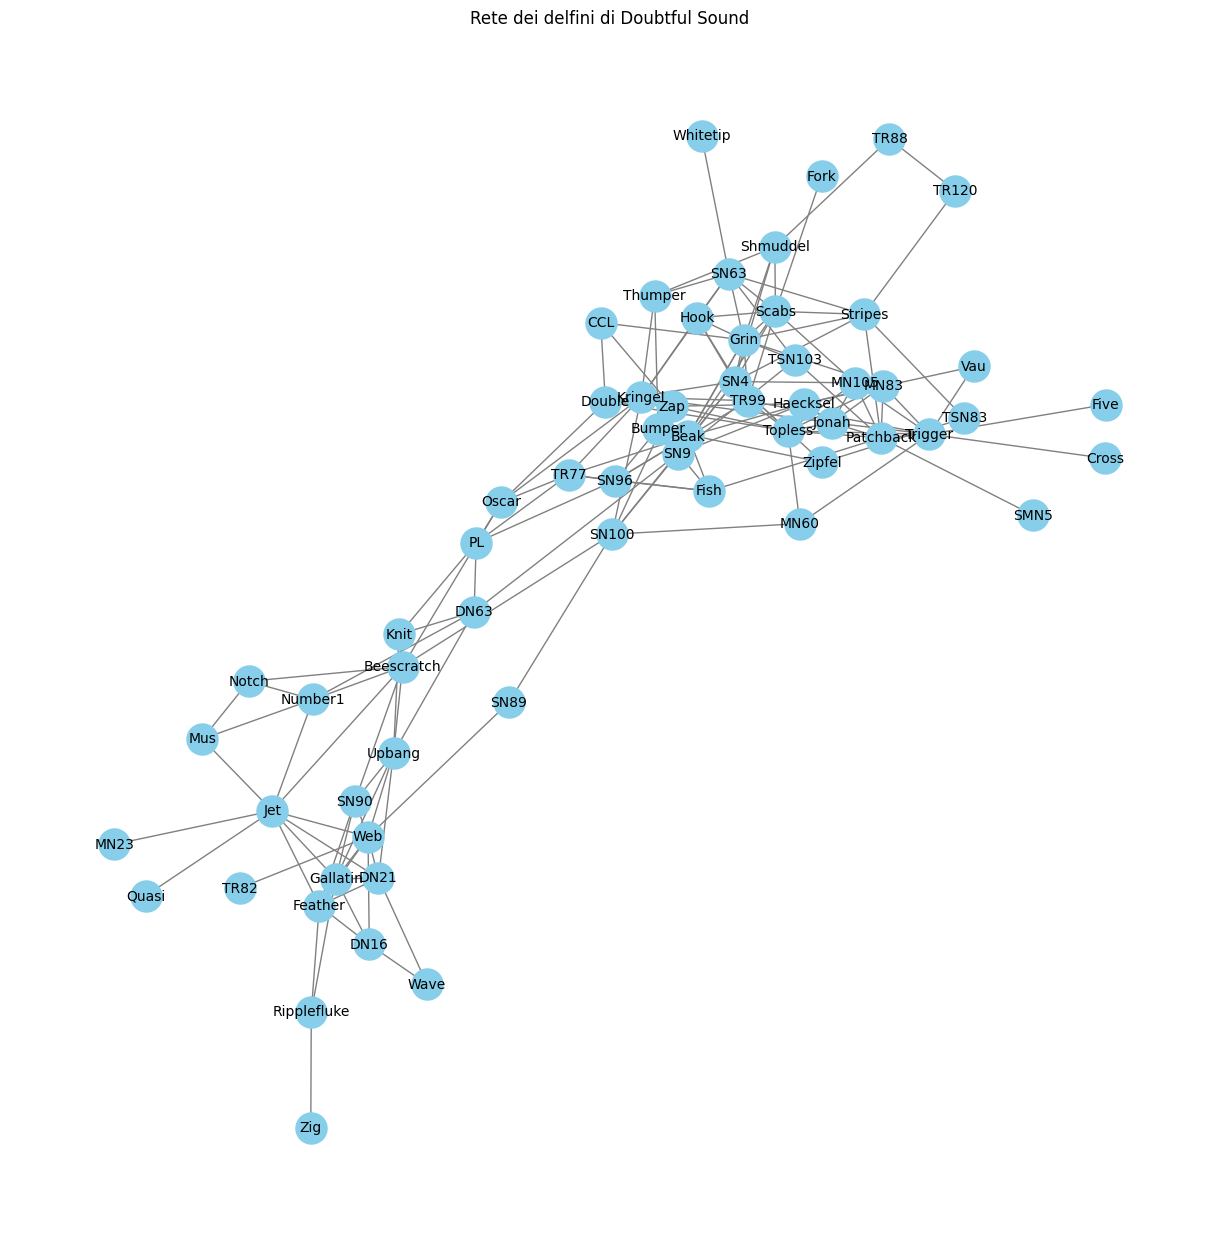

In [15]:
# Disegnare il grafo
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, font_color="black")
plt.title("Rete dei delfini di Doubtful Sound")
plt.show()


In [16]:
# Grado di ogni nodo
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

# Centralità di betweenness
betweenness_dict = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

# Centralità di closeness
closeness_dict = nx.closeness_centrality(G)
nx.set_node_attributes(G, closeness_dict, 'closeness')

# Centralità di eigenvector
eigenvector_dict = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

# Visualizzare alcune metriche
print("Grado di ogni nodo:", degree_dict)
print("Centralità di betweenness:", betweenness_dict)
print("Centralità di closeness:", closeness_dict)
print("Centralità di eigenvector:", eigenvector_dict)


Grado di ogni nodo: {'Beak': 6, 'Beescratch': 8, 'Bumper': 4, 'CCL': 3, 'Cross': 1, 'DN16': 4, 'DN21': 6, 'DN63': 5, 'Double': 6, 'Feather': 7, 'Fish': 5, 'Five': 1, 'Fork': 1, 'Gallatin': 8, 'Grin': 12, 'Haecksel': 7, 'Hook': 6, 'Jet': 9, 'Jonah': 7, 'Knit': 4, 'Kringel': 9, 'MN105': 6, 'MN23': 1, 'MN60': 3, 'MN83': 6, 'Mus': 3, 'Notch': 3, 'Number1': 5, 'Oscar': 5, 'Patchback': 9, 'PL': 5, 'Quasi': 1, 'Ripplefluke': 3, 'Scabs': 10, 'Shmuddel': 5, 'SMN5': 1, 'SN100': 7, 'SN4': 11, 'SN63': 8, 'SN89': 2, 'SN9': 8, 'SN90': 5, 'SN96': 6, 'Stripes': 7, 'Thumper': 4, 'Topless': 11, 'TR120': 2, 'TR77': 6, 'TR82': 1, 'TR88': 2, 'TR99': 7, 'Trigger': 10, 'TSN103': 4, 'TSN83': 2, 'Upbang': 7, 'Vau': 2, 'Wave': 2, 'Web': 9, 'Whitetip': 1, 'Zap': 5, 'Zig': 1, 'Zipfel': 3}
Centralità di betweenness: {'Beak': 0.01908259621374376, 'Beescratch': 0.21332443553281097, 'Bumper': 0.00907281243346817, 'CCL': 0.0023737965131407756, 'Cross': 0.0, 'DN16': 0.004380300179480508, 'DN21': 0.029372536747686685, '

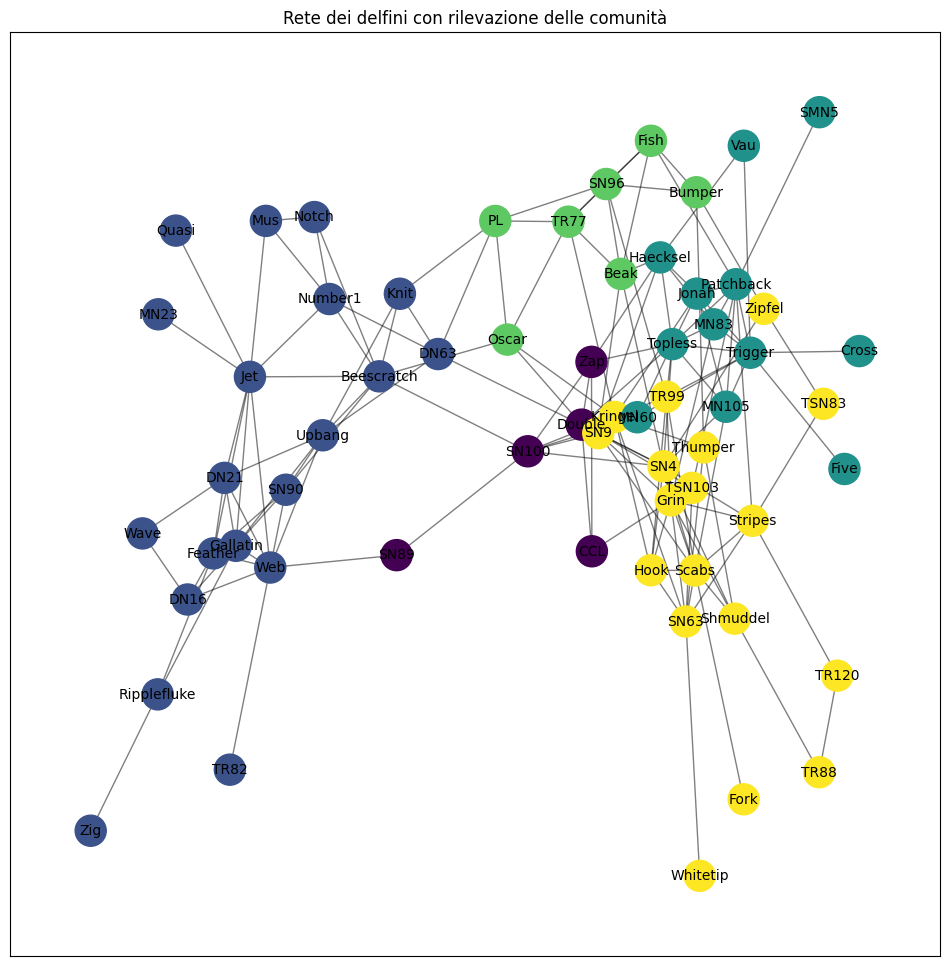

In [17]:
# Rilevazione delle comunità
partition = community_louvain.best_partition(G)

# Aggiungere l'informazione delle comunità ai nodi
nx.set_node_attributes(G, partition, 'community')

# Visualizzare la rete con le comunità
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')

nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=500, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Rete dei delfini con rilevazione delle comunità")
plt.show()


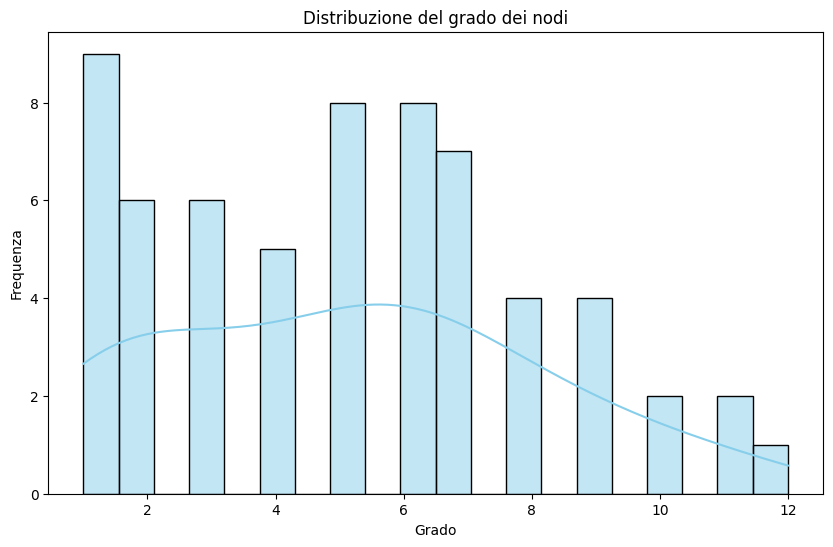

In [18]:
degrees = [degree for node, degree in G.degree()]
plt.figure(figsize=(10, 6))
sns.histplot(degrees, bins=20, kde=True, color='skyblue')
plt.title('Distribuzione del grado dei nodi')
plt.xlabel('Grado')
plt.ylabel('Frequenza')
plt.show()


In [19]:
diameter = nx.diameter(G)
print(f"Diametro della rete: {diameter}")

Diametro della rete: 8


Coefficiente di clustering medio: 0.2589582460550202


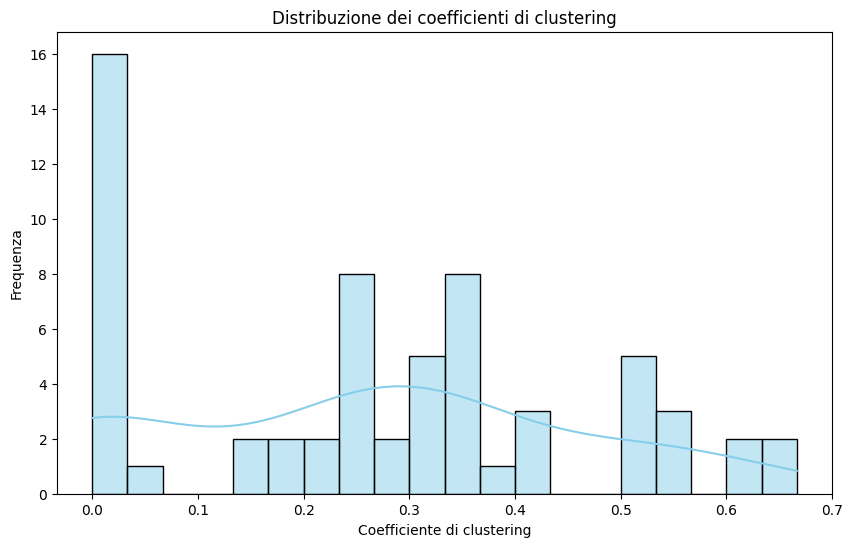

In [20]:
clustering_coeffs = nx.clustering(G)
average_clustering = nx.average_clustering(G)
print(f"Coefficiente di clustering medio: {average_clustering}")

plt.figure(figsize=(10, 6))
sns.histplot(list(clustering_coeffs.values()), bins=20, kde=True, color='skyblue')
plt.title('Distribuzione dei coefficienti di clustering')
plt.xlabel('Coefficiente di clustering')
plt.ylabel('Frequenza')
plt.show()

In [21]:
# Top 5 nodi per centralità di grado
top_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di grado:", top_degree)

# Top 5 nodi per centralità di betweenness
top_betweenness = sorted(betweenness_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di betweenness:", top_betweenness)

# Top 5 nodi per centralità di closeness
top_closeness = sorted(closeness_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di closeness:", top_closeness)

# Top 5 nodi per centralità di eigenvector
top_eigenvector = sorted(eigenvector_dict.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 nodi per centralità di eigenvector:", top_eigenvector)


Top 5 nodi per centralità di grado: [('Grin', 12), ('SN4', 11), ('Topless', 11), ('Scabs', 10), ('Trigger', 10)]
Top 5 nodi per centralità di betweenness: [('SN100', 0.24823719602893804), ('Beescratch', 0.21332443553281097), ('SN9', 0.1431495183426175), ('SN4', 0.13856978865859435), ('DN63', 0.11823861926938342)]
Top 5 nodi per centralità di closeness: [('SN100', 0.4178082191780822), ('SN9', 0.40397350993377484), ('SN4', 0.39869281045751637), ('Kringel', 0.391025641025641), ('Grin', 0.3765432098765432)]
Top 5 nodi per centralità di eigenvector: [('Grin', 0.3157810764804676), ('SN4', 0.3005609284704956), ('Topless', 0.28500310473240437), ('Scabs', 0.281097017160587), ('TR99', 0.21769051331081507)]


In [22]:
# Rimuovere nodi e verificare l'effetto sul diametro

original_diameter = nx.diameter(G)

# Copiare il grafo per evitare modifiche permanenti
G_copy = G.copy()
nodes_to_remove = random.sample(list(G_copy.nodes()), k=5)

G_copy.remove_nodes_from(nodes_to_remove)

try:
    new_diameter = nx.diameter(G_copy)
    print(f"Diametro originale: {original_diameter}, nuovo diametro dopo rimozione dei nodi: {new_diameter}")
except nx.NetworkXError:
    print("La rete è diventata sconnessa dopo la rimozione dei nodi.")


Diametro originale: 8, nuovo diametro dopo rimozione dei nodi: 8


In [28]:
# Creare layout 3D per la rete
pos_3d = nx.spring_layout(G, dim=3)

# Traccia degli archi
edge_trace = []
for edge in G.edges():
    x0, y0, z0 = pos_3d[edge[0]]
    x1, y1, z1 = pos_3d[edge[1]]
    edge_trace.append(go.Scatter3d(
        x=[x0, x1, None],
        y=[y0, y1, None],
        z=[z0, z1, None],
        mode='lines',
        line=dict(color='gray', width=1)
    ))

# Traccia dei nodi
node_trace = go.Scatter3d(
    x=[pos_3d[node][0] for node in G.nodes()],
    y=[pos_3d[node][1] for node in G.nodes()],
    z=[pos_3d[node][2] for node in G.nodes()],
    mode='markers+text',
    text=[node for node in G.nodes()],  # Usare l'ID del nodo come etichetta
    marker=dict(size=5, color='skyblue')
)

fig = go.Figure(data=edge_trace + [node_trace])
fig.update_layout(title="Rete dei delfini in 3D",
                  scene=dict(xaxis=dict(showbackground=False),
                             yaxis=dict(showbackground=False),
                             zaxis=dict(showbackground=False)))
fig.show()




ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed